In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import utils as utils
import gcfb_v211 as gcfb

In [2]:
# Param values from PUI 2003
n = 4       
b1 = 1.81   
c1 = -2.96  
b2 = 2.17   
c2 = 2.20   
frat0 = 0.466
frat1 = 0.0109

n_rsl = 2**12
fs = 44100

ps = 50
frat = frat0 + frat1*ps

### Frequency Response of the Gammachirp Finterbank 

In [3]:
fp_list = np.array([250, 500, 1000, 2000, 4000, 8000])
fp_xtick = np.array([100, 250, 500, 1000, 2000, 4000, 8000, 16000])
erb_n_xtick, _ = utils.freq2erb(fp_xtick)

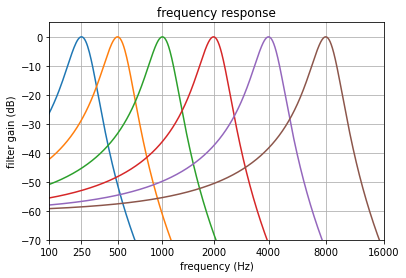

In [4]:
fig, ax = plt.subplots()

for fp in fp_list:
    fr1, _ = gcfb.fp2_to_fr1(n, b1, c1, b2, c2, frat, fp)
    cgc_resp = gcfb.cmprs_gc_frsp(fr1, fs, n, b1, c1, frat, b2, c2, n_rsl)
    cgc_frsp = cgc_resp.cgc_frsp
    
    cgc_frsp_db = 20 * np.log10(cgc_frsp/np.max(cgc_frsp))
    freq = np.array(cgc_resp.freq)
    erb_num, _ = utils.freq2erb(freq)

    plt.plot(erb_num[0, :], cgc_frsp_db[0, :])
    ax.set_xlim([erb_n_xtick[0], erb_n_xtick[-1]])
    ax.set_ylim([-70, 5])
    ax.set_xticks(erb_n_xtick)
    ax.set_xticklabels(fp_xtick)
    ax.set_xlabel("frequency (Hz)")
    ax.set_ylabel("filter gain (dB)")
    plt.title("frequency response")

plt.grid()
plt.show()

### Equivalent Rectanglar Bandwidth (ERB)

Text(0.5, 1.0, 'equivalent rectanglar bandwidth (ERB)')

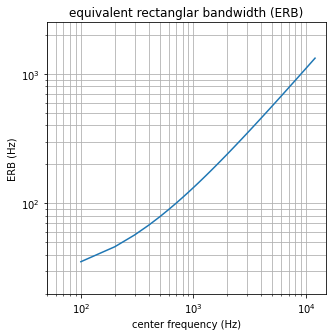

In [5]:
freq = np.arange(100, 12000+1, 100)
_, erb_n = utils.freq2erb(freq)

fig, ax = plt.subplots(figsize=(5,5))
plt.loglog(freq, erb_n)
ax.set_xlim([50, 15000])
ax.set_ylim([20, 2500])
plt.grid(which='both')
ax.set_xlabel("center frequency (Hz)")
ax.set_ylabel("ERB (Hz)")
plt.title("equivalent rectanglar bandwidth (ERB)")

### Filter Level Dependency

In [6]:
marker = ['o','x','d','*','^','p','s']
cmap = plt.get_cmap("tab10")

fp = 2000
ps_list = [30, 40, 50, 60, 70, 80, 90]

Text(0.5, 1.0, 'frequency response')

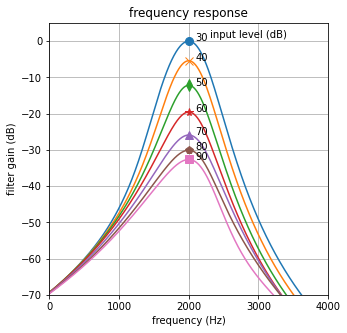

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

cgc_frs_db_max = np.array([])
for cnt, ps in enumerate(ps_list):
    frat = frat0 + frat1*ps
    fr1, _ = gcfb.fp2_to_fr1(n, b1, c1, b2, c2, frat, fp) 
    cgc_resp = gcfb.cmprs_gc_frsp(fr1, fs, n, b1, c1, frat, b2, c2, n_rsl)
    cgc_frsp = cgc_resp.cgc_frsp

    if cnt == 0:
        cgc_frsp_ref = np.max(cgc_frsp)

    cgc_frsp_db = 20 * np.log10(cgc_frsp/np.max(cgc_frsp_ref))
    freq = np.array(cgc_resp.freq)
    cgc_frs_db_max = np.append(cgc_frs_db_max, np.max(cgc_frsp_db))

    plt.plot(freq[0, :], cgc_frsp_db[0, :], color=cmap(cnt))
    plt.plot(fp, cgc_frs_db_max[cnt], marker[cnt], color=cmap(cnt), markersize=8)
    ax.set_xlim([0, 4000])
    ax.set_ylim([-70, 5])
    ax.set_xticks([0, 1000, 2000, 3000, 4000])
    ax.set_xlabel('frequency (Hz)')
    ax.set_ylabel('filter gain (dB)')
    plt.grid()

    plt.text(fp*1.05, cgc_frs_db_max[cnt], f"{ps}")

plt.text(fp*1.15, 1.0, 'input level (dB)')
plt.title('frequency response')

### Input/Output Function

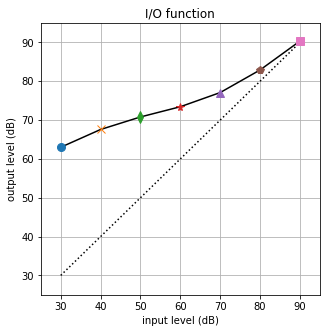

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

output_level = cgc_frs_db_max + ps_list + 33
plt.plot(ps_list, output_level, 'k', ps_list, ps_list, ':k')

for cnt in range(len(output_level)):
    plt.plot(ps_list[cnt], output_level[cnt], marker[cnt], \
        color=cmap(cnt), clip_on = False, markersize=8)

ax.set_xlim([30, 90])
ax.set_ylim([30, 90])
ax.set_xlabel("input level (dB)")
ax.set_ylabel("output level (dB)")
plt.title("I/O function")
plt.grid()